# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!git clone https://github.com/ultralytics/yolov5 "D:/BHAVIK/Drowsiness Detection using YOLOv5/yolov5"

fatal: destination path 'D:/BHAVIK/Drowsiness Detection using YOLOv5/yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
torch.__version__

'2.1.2+cu121'

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Comp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-6 Python-3.11.5 torch-2.1.2+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [8]:
img = "https://images.fastcompany.com/upload/traffic-jamz-2.jpg"

In [9]:
results = model(img)
results.print()

image 1/1: 408x616 3 persons, 26 cars, 4 buss, 2 trucks
Speed: 706.6ms pre-process, 171.2ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

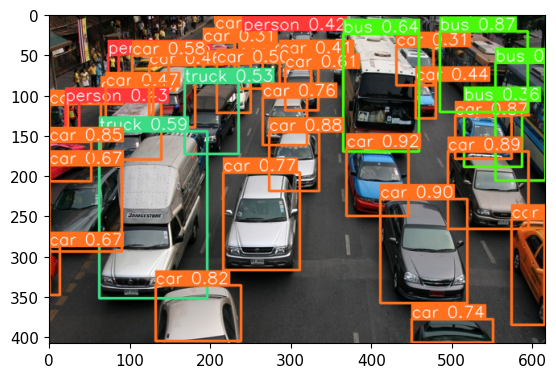

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[55, 32, 24],
         [68, 48, 39],
         [80, 61, 54],
         ...,
         [ 7, 12,  8],
         [10, 15,  9],
         [12, 17, 11]],
 
        [[51, 28, 20],
         [50, 30, 21],
         [78, 59, 52],
         ...,
         [ 5, 10,  4],
         [ 6, 11,  5],
         [12, 17, 10]],
 
        [[80, 60, 51],
         [52, 32, 23],
         [50, 32, 22],
         ...,
         [16, 22, 12],
         [25, 33, 22],
         [36, 44, 33]],
 
        ...,
 
        [[54, 53, 51],
         [53, 52, 50],
         [53, 52, 50],
         ...,
         [38, 40, 39],
         [95, 97, 96],
         [51, 53, 52]],
 
        [[49, 48, 46],
         [54, 53, 51],
         [56, 55, 53],
         ...,
         [94, 94, 94],
         [46, 46, 46],
         [33, 33, 33]],
 
        [[54, 53, 51],
         [50, 49, 47],
         [50, 49, 47],
         ...,
         [51, 51, 51],
         [39, 39, 39],
         [30, 30, 30]]], dtype=uint8)]

# 4. Real Time Detections

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [15]:
import uuid   # Unique identifier
import os
import time

In [16]:
IMAGES_PATH = os.path.join('D:','BHAVIK','Drowsiness Detection using YOLOv5','data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 15

In [17]:
# Initialize the camera
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()

        # Check if the frame is empty
        if not ret or frame is None or frame.size == 0:
            continue

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2-second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()

In [18]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.32175581-ac98-11ee-9a27-e4a7a0b5f481.jpg


In [19]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aae9f-ac98-11ee-a60b-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea0-ac98-11ee-a095-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea1-ac98-11ee-b219-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea2-ac98-11ee-979e-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea3-ac98-11ee-bbc5-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea4-ac98-11ee-8fc7-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea5-ac98-11ee-8a0f-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea6-ac98-11ee-ad5f-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea7-ac98-11ee-b207-e4a7a0b5f481.jpg
D:BHAVIK\Drowsiness Detection using YOLOv5\data\images\awake.321aaea8-ac98-11ee-8e

In [20]:
!git clone https://github.com/tzutalin/labelImg.git "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg"

fatal: destination path 'D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg' already exists and is not an empty directory.


In [21]:
!pip install pyqt5 lxml --upgrade --target="D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg"
!cd "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg" && "C:\Users\Comp\anaconda3\Scripts\pyrcc5" -o "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg/libs/resources.py" "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg/resources.qrc"
!cd "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg" && python "D:/BHAVIK/Drowsiness Detection using YOLOv5/labelImg/labelImg.py"

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/2e/84/09e9d384f280e5540e6a6a6c09d736a064b5b03ce7512fef905cb70f8165/lxml-5.0.1-cp311-cp311-win_amd64.whl.metadata
  Using cached lxml-5.0.1-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/8e/e2/d296cb17bae19ba49137a2649934a70d5f48cc99b7daa6ce9cf1aecddfeb/PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata (524 bytes)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl (6.8 MB)
Using cached lxml-5.0.1

In [22]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [23]:
# Use %cd to change the current working directory
%cd "D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5"

# Run the YOLOv5 training command
!python train.py --img 320 --batch 16 --epochs 500 --data "D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5\dataset.yaml" --weights yolov5s.pt --workers 0


D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5


train: weights=yolov5s.pt, cfg=, data=D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5\dataset.yaml, hyp=D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5\data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=D:\BHAVIK\Drowsiness Detection using YOLOv5\yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 18 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'D:\BHAVIK\Drowsiness': No such file or directory
YOLOv5  2023-12-16 Python-3.11.5 torch-2.1.2+cu121 CPU

hyp

The above model training will train on 500 epochs(instances), which will take considerable amount of time. After waiting around 15-20 mins, halt the kernel without reseting it, and continue running the next instructions. Else, wait for it complete.

# 6. Load Custom Model

**Replace 'exp' with most recent file in the designated folder for results based on all inputs since the first run

In [25]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='D:/BHAVIK/Drowsiness Detection using YOLOv5/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Comp/.cache\torch\hub\master.zip
YOLOv5  2024-1-6 Python-3.11.5 torch-2.1.2+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [26]:
img = os.path.join('D:\BHAVIK\Drowsiness Detection using YOLOv5\data\images','drowsy.b4f12e71-ac87-11ee-8ee9-e4a7a0b5f481.jpg')

In [27]:
print(img)
results = model(img)

D:\BHAVIK\Drowsiness Detection using YOLOv5\data\images\drowsy.b4f12e71-ac87-11ee-8ee9-e4a7a0b5f481.jpg


In [28]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 1.8ms pre-process, 173.4ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


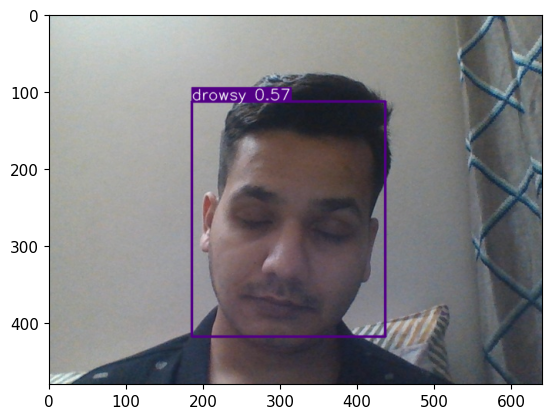

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    # Webcam feed
    ret, frame = cap.read()

    # Check if the frame is empty
    if not ret or frame is None or frame.size == 0:
        continue

    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()